In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df = pd.read_csv('flood.csv')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [3]:
missing_values = df.isnull().sum()
data_types = df.dtypes
summary_stats = df.describe()

missing_values,data_types,summary_stats

(MonsoonIntensity                   0
 TopographyDrainage                 0
 RiverManagement                    0
 Deforestation                      0
 Urbanization                       0
 ClimateChange                      0
 DamsQuality                        0
 Siltation                          0
 AgriculturalPractices              0
 Encroachments                      0
 IneffectiveDisasterPreparedness    0
 DrainageSystems                    0
 CoastalVulnerability               0
 Landslides                         0
 Watersheds                         0
 DeterioratingInfrastructure        0
 PopulationScore                    0
 WetlandLoss                        0
 InadequatePlanning                 0
 PoliticalFactors                   0
 FloodProbability                   0
 dtype: int64,
 MonsoonIntensity                     int64
 TopographyDrainage                   int64
 RiverManagement                      int64
 Deforestation                        int64
 Urbanizati

In [4]:
print(summary_stats)

       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.

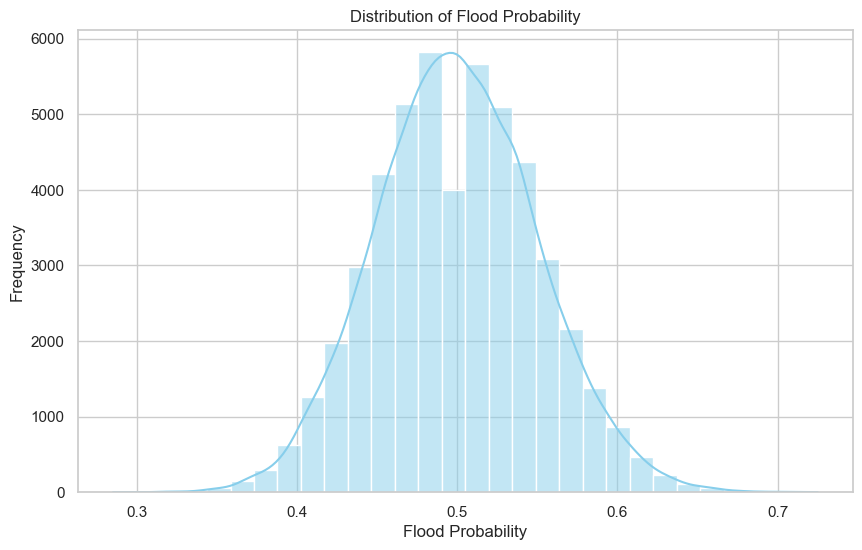

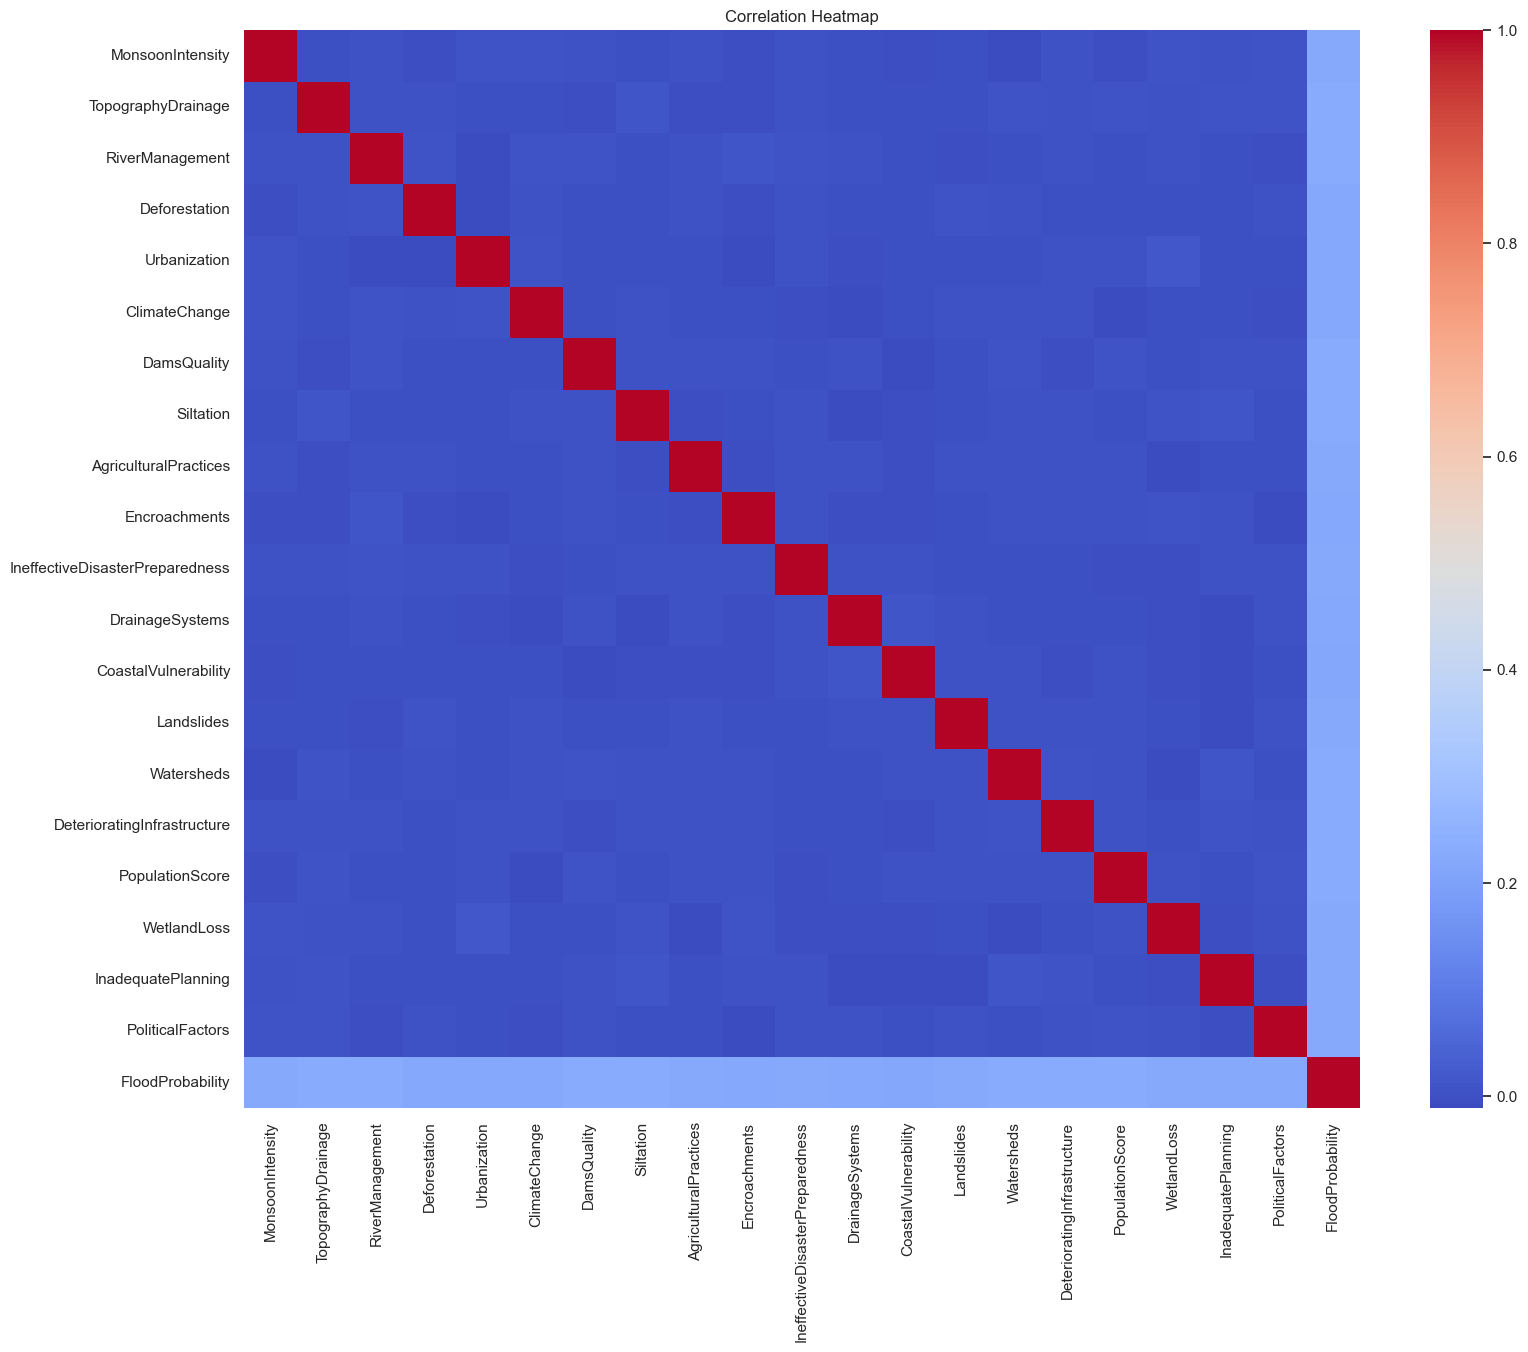

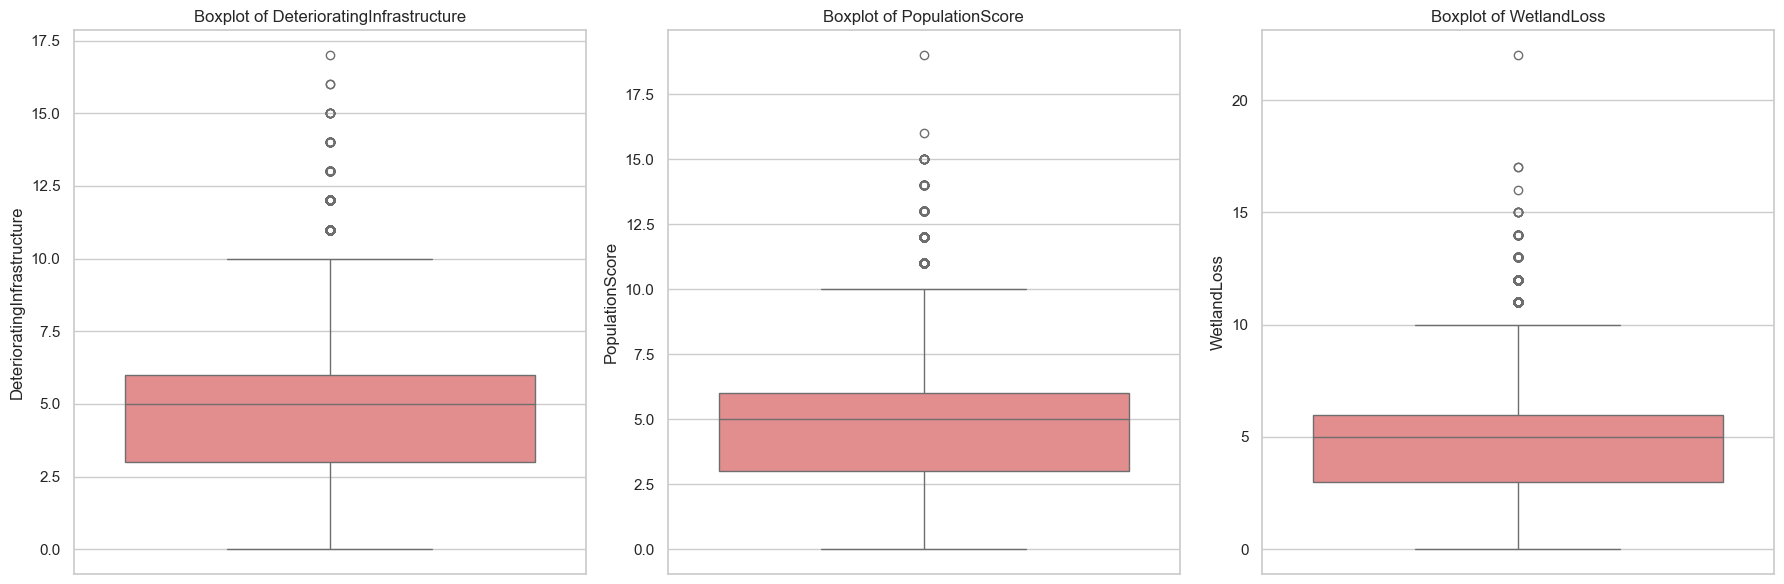

In [5]:

# Set style for the plots
sns.set(style='whitegrid')

# 1. Histogram for FloodProbability
plt.figure(figsize=(10, 6))
sns.histplot(df['FloodProbability'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(18, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Boxplots for selected features to check for outliers
selected_features = ['DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss']
plt.figure(figsize=(18, 6))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [6]:
# Define features and target variable
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to handle outliers and different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes of the training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((40000, 20), (10000, 20), (40000,), (10000,))

In [7]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.020469645000000012, 0.0006710998077500004, 0.7305453910052718)

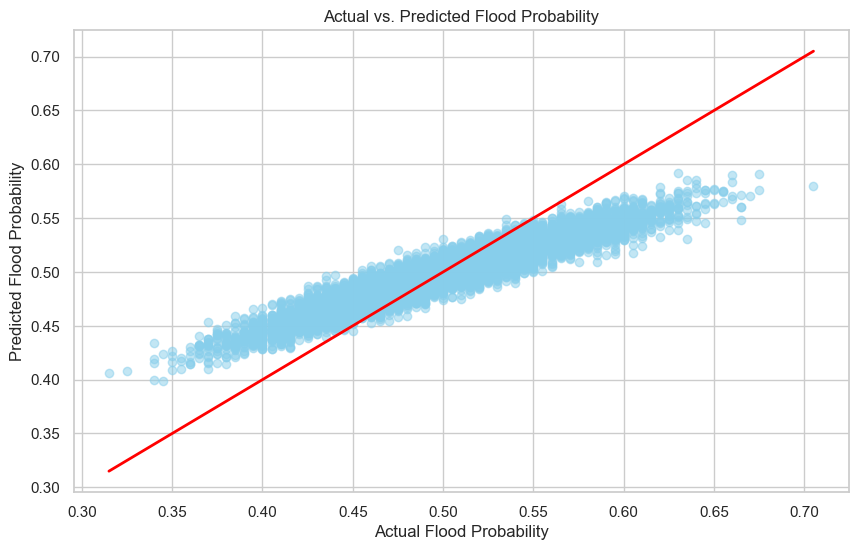

C:\Users\nishi\AppData\Local\Temp\ipykernel_16452\1597568184.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


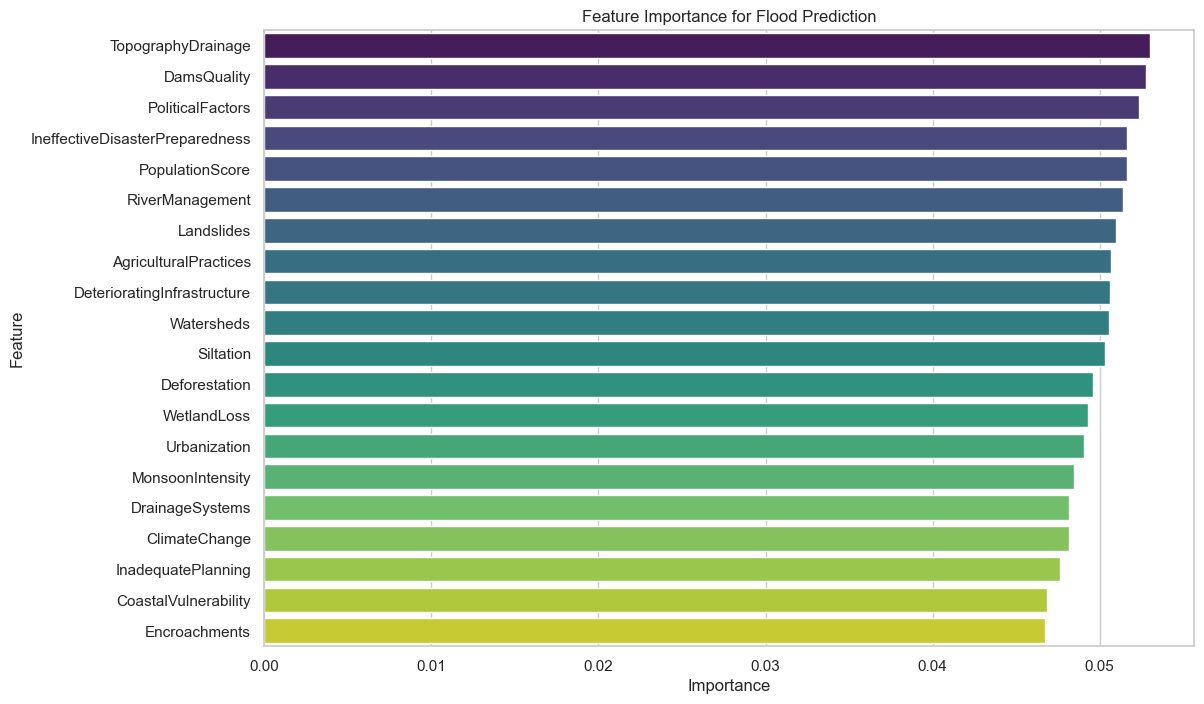

In [8]:
# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs. Predicted Flood Probability')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.show()

# 2. Feature Importance Plot
feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Flood Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [9]:
pip install numpy pandas scikit-learn xgboost tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\nishi\appdata\local\programs\python\python311\lib\site-packages (1.26.4)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Data Handling and Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost
from xgboost import XGBRegressor

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
# Load the dataset
df = pd.read_csv('flood.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [12]:
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost R2 Score:", r2_xgb)


XGBoost MSE: 0.00023676951403782862
XGBoost R2 Score: 0.9049342048825302


In [17]:
# Calculate MAPE for XGBoost
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
accuracy_xgb = 100 - mape_xgb

print("XGBoost Accuracy:", accuracy_xgb, "%")


XGBoost Accuracy: 97.56097423765999 %


In [23]:
import joblib

In [24]:


# Save XGBoost model
joblib.dump(xgb_model, 'xgboost_flood_model.pkl')

['xgboost_flood_model.pkl']

In [18]:
nn_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Regression output
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [19]:
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 4.5653e-04 - val_mean_squared_error: 4.5653e-04
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.0317e-04 - mean_squared_error: 3.0317e-04 - val_loss: 1.4287e-04 - val_mean_squared_error: 1.4287e-04
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2020e-04 - mean_squared_error: 1.2020e-04 - val_loss: 7.4552e-05 - val_mean_squared_error: 7.4552e-05
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.1527e-05 - mean_squared_error: 7.1527e-05 - val_loss: 5.2192e-05 - val_mean_squared_error: 5.2192e-05
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.0833e-05 - mean_squared_error: 5.0833e-05 - val_loss: 7.8074e-05 - val_mean_squared_error: 7.8074e-05
Epoch 7/20
1000/1000 ━━━━━━━

In [20]:
nn_loss, nn_mse = nn_model.evaluate(X_test_scaled, y_test)
print("Neural Network MSE:", nn_mse)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4732e-06 - mean_squared_error: 1.4732e-06
Neural Network MSE: 1.4947836461942643e-06


In [21]:
# Make predictions with Neural Network
y_pred_nn = nn_model.predict(X_test_scaled)

# Calculate MAPE for Neural Network
mape_nn = np.mean(np.abs((y_test - y_pred_nn.flatten()) / y_test)) * 100
accuracy_nn = 100 - mape_nn

print("Neural Network Accuracy:", accuracy_nn, "%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Neural Network Accuracy: 99.79615478932874 %


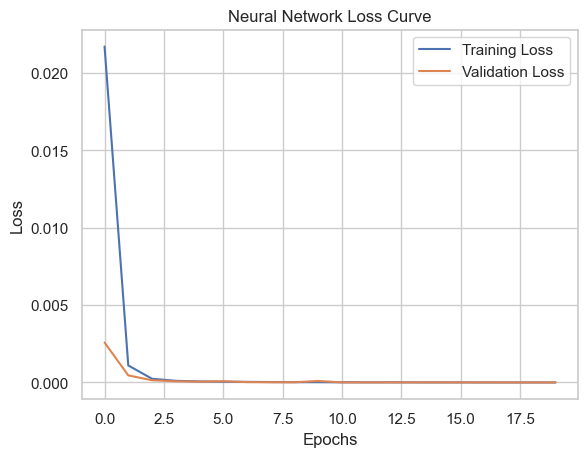

In [22]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Loss Curve')
plt.legend()
plt.show()
